# Imports

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [5]:
docs = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

# Preprocessing & Vectorization

In [6]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []
    
    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                   for token in tokenized 
                   if not token.lower() in stopwords.words('english') 
                   if token.isalpha()]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
        
    return preprocessed

preprocessed = preprocess(docs)

In [7]:
preprocessed[0]

'emma jane austen volum chapter emma woodhous handsom clever rich comfort home happi disposit seem unit best bless exist live near year world littl distress vex youngest two daughter affection indulg father consequ sister marriag mistress hous earli period mother die long ago indistinct remembr caress place suppli excel woman gover fallen littl short mother affect sixteen year miss taylor woodhous famili le gover friend fond daughter particular emma intimaci sister even miss taylor ceas hold nomin offic gover mild temper hard allow impos restraint shadow author long pass away live togeth friend friend mutual attach emma like high esteem miss taylor judgment direct chiefli real evil inde emma situat power rather much way disposit think littl well disadvantag threaten alloy mani enjoy danger howev present unperceiv mean rank misfortun sorrow came gentl sorrow shape disagre miss taylor marri miss taylor loss first brought grief belov friend emma first sat mourn thought continu wed gone fa

In [9]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)
vectorized = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

vectorized.head()

,aaron,aaronit,ab,aback,abaddon,abaft,abagtha,abana,abandon,abarim,abas,abash,abassin,abat,abba,abbana,abbey,abbeyland,abbot,abbrevi,abda,abdeel,abdi,abdic,abdiel,abdomen,abdon,abe,abeam,abednego,abel,abelard,abelbethmaachah,abelmaim,abelmeholah,abelmizraim,abelshittim,aberr,abey,abez,...,ziza,zizah,zmite,zoan,zoar,zoba,zobah,zobebah,zodiac,zodiack,zoetrop,zogranda,zohar,zoheleth,zoheth,zola,zone,zoo,zook,zoolog,zophah,zophai,zophar,zophiel,zophim,zorah,zorathit,zoreah,zorit,zoroast,zorobabel,zso,zuar,zumpt,zuph,zur,zuriel,zurishaddai,zuyder,zuzim
0,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.011735,0.000000,0.000621,0.000000,0.0000,0.0000,0.000544,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
1,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000964,0.0000,0.0000,0.000000,0.001072,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
2,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00044,0.000000,0.00000,0.0,0.0,0.000542,0.000000,0.0,0.000000,0.000819,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
3,0.030433,0.0002,0.0,0.0,0.0001,0.0,0.0001,0.0001,0.00000,0.000351,0.00071,0.0,0.0,0.000398,0.000301,0.0,0.000000,0.000000,0.000000,0.000000,0.0002,0.0001,0.000263,0.000000,0.000088,0.0,0.000802,0.0,0.0,0.001316,0.001403,0.0,0.0002,0.0001,0.000301,0.0001,0.0001,0.0,0.0,0.0001,...,0.0002,0.0001,0.0,0.000701,0.001002,0.0002,0.001102,0.0001,0.0,0.0,0.0,0.0,0.000401,0.0001,0.0001,0.0,0.0,0.0,0.0,0.0,0.0002,0.0001,0.000401,0.0,0.0001,0.000802,0.0001,0.0001,0.0001,0.0,0.000301,0.0,0.000501,0.0,0.000301,0.000501,0.0001,0.000501,0.0,0.0001
4,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000


# Clustering

## KMeans

In [10]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectorized)

In [11]:
clusters

array([4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 3, 3, 2], dtype=int32)

In [12]:
pd.DataFrame({'name':gutenberg.fileids(), 'cluster':clusters})

,name,cluster
0,austen-emma.txt,4
1,austen-persuasion.txt,4
2,austen-sense.txt,4
3,bible-kjv.txt,2
4,blake-poems.txt,2
5,bryant-stories.txt,1
6,burgess-busterbrown.txt,1
7,carroll-alice.txt,1
8,chesterton-ball.txt,1
9,chesterton-brown.txt,1


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a22e85128>,
                 k=None, metric=None, model=None, timings=True)

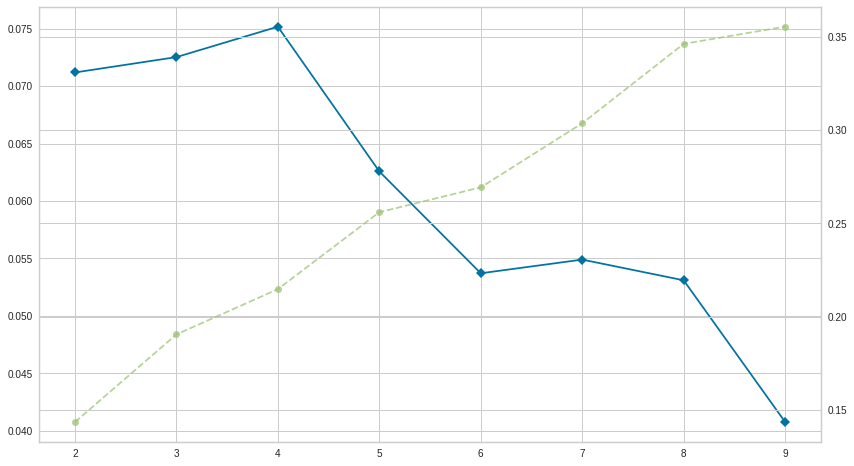

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(vectorized)

In [16]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(vectorized)

In [19]:
df = pd.DataFrame(docs, columns=['text'])
df['clusters'] = clusters
df['title'] = gutenberg.fileids()
df

,text,clusters,title
0,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...,2,austen-emma.txt
1,[Persuasion by Jane Austen 1818]\n\n\nChapter ...,2,austen-persuasion.txt
2,[Sense and Sensibility by Jane Austen 1811]\n\...,2,austen-sense.txt
3,[The King James Bible]\n\nThe Old Testament of...,1,bible-kjv.txt
4,[Poems by William Blake 1789]\n\n \nSONGS OF I...,1,blake-poems.txt
5,[Stories to Tell to Children by Sara Cone Brya...,2,bryant-stories.txt
6,[The Adventures of Buster Bear by Thornton W. ...,2,burgess-busterbrown.txt
7,[Alice's Adventures in Wonderland by Lewis Car...,2,carroll-alice.txt
8,[The Ball and The Cross by G.K. Chesterton 190...,2,chesterton-ball.txt
9,[The Wisdom of Father Brown by G. K. Chesterto...,2,chesterton-brown.txt


## Agglomerative Clustering

In [21]:
model = AgglomerativeClustering(n_clusters=3)
clusters = model.fit_predict(vectorized)

In [22]:
df = pd.DataFrame(docs, columns=['text'])
df['clusters'] = clusters
df['title'] = gutenberg.fileids()
df

,text,clusters,title
0,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...,0,austen-emma.txt
1,[Persuasion by Jane Austen 1818]\n\n\nChapter ...,0,austen-persuasion.txt
2,[Sense and Sensibility by Jane Austen 1811]\n\...,0,austen-sense.txt
3,[The King James Bible]\n\nThe Old Testament of...,2,bible-kjv.txt
4,[Poems by William Blake 1789]\n\n \nSONGS OF I...,2,blake-poems.txt
5,[Stories to Tell to Children by Sara Cone Brya...,0,bryant-stories.txt
6,[The Adventures of Buster Bear by Thornton W. ...,0,burgess-busterbrown.txt
7,[Alice's Adventures in Wonderland by Lewis Car...,0,carroll-alice.txt
8,[The Ball and The Cross by G.K. Chesterton 190...,0,chesterton-ball.txt
9,[The Wisdom of Father Brown by G. K. Chesterto...,0,chesterton-brown.txt


## KNN

In [23]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=3)

nn.fit(vectorized)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [24]:
nn.kneighbors(vectorized)

(array([[0.        , 1.08788717, 1.1206231 ],
        [0.        , 1.08234929, 1.08921214],
        [0.        , 1.09724164, 1.1563887 ],
        [0.        , 1.0326268 , 1.12199336],
        [0.        , 0.9953773 , 1.0150017 ],
        [0.        , 0.91968895, 0.9516182 ],
        [0.        , 1.16850939, 1.21964384],
        [0.        , 1.11238846, 1.11630841],
        [0.        , 1.05921299, 1.1292343 ],
        [0.        , 0.92272964, 0.9516182 ],
        [0.        , 1.07821414, 1.14067387],
        [0.        , 0.91968895, 0.92272964],
        [0.        , 1.03204033, 1.07016846],
        [0.        , 0.91323274, 1.0150017 ],
        [0.        , 1.15160403, 1.15200847],
        [0.        , 1.06631686, 1.15160403],
        [0.        , 1.06631686, 1.15200847],
        [0.        , 0.91323274, 0.9953773 ]]), array([[ 0, 11,  9],
        [ 1, 11,  9],
        [ 2, 11,  9],
        [ 3, 13, 17],
        [ 4, 17, 13],
        [ 5, 11,  9],
        [ 6,  5,  9],
        [ 7,  5, 

## DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=2)
db.fit(vectorized)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [31]:
clusters = db.labels_

In [32]:
df = pd.DataFrame(docs, columns=['text'])
df['clusters'] = clusters
df['title'] = gutenberg.fileids()
df

,text,clusters,title
0,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...,-1,austen-emma.txt
1,[Persuasion by Jane Austen 1818]\n\n\nChapter ...,-1,austen-persuasion.txt
2,[Sense and Sensibility by Jane Austen 1811]\n\...,-1,austen-sense.txt
3,[The King James Bible]\n\nThe Old Testament of...,-1,bible-kjv.txt
4,[Poems by William Blake 1789]\n\n \nSONGS OF I...,0,blake-poems.txt
5,[Stories to Tell to Children by Sara Cone Brya...,1,bryant-stories.txt
6,[The Adventures of Buster Bear by Thornton W. ...,-1,burgess-busterbrown.txt
7,[Alice's Adventures in Wonderland by Lewis Car...,-1,carroll-alice.txt
8,[The Ball and The Cross by G.K. Chesterton 190...,-1,chesterton-ball.txt
9,[The Wisdom of Father Brown by G. K. Chesterto...,1,chesterton-brown.txt


# 

# Topic Modeling
* LSA
* LDA

In [34]:
from sklearn.decomposition import NMF
num_keywords = 5
num_topics = 8

# vectorize our documents
vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

array([[0.        , 0.00147315, 0.00171738, 0.78028325, 0.01477805,
        0.00269486, 0.        , 0.00199331],
       [0.01396995, 0.        , 0.        , 0.76436869, 0.00135738,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.7680109 , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.5335766 , 0.04317875, 0.        , 0.        ,
        0.06479644, 0.        , 0.        ],
       [0.00978021, 0.57789205, 0.        , 0.        , 0.10978895,
        0.03125684, 0.        , 0.        ],
       [0.46461202, 0.00798583, 0.        , 0.        , 0.15675682,
        0.14533097, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.14274258,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.15965183, 0.        , 0.        ],
       [0.        , 0.00162905, 0.        , 0.        , 0.        ,
        0.        , 0.      

In [ ]:
pd.DataFrame()

In [35]:
for index, topic in enumerate(model.components_):
    print('topic', index)
    # sort the scores and grab the index of max scoring words in each
    for i in topic.argsort()[:-num_keywords-1 :-1]:
        # term, component score
        print(vectorizer.get_feature_names()[i], topic[i])

    print('---------------------------')

topic 0
said 0.41470821443243494
littl 0.3270915969434652
one 0.31729544596386905
whale 0.29825750629143033
like 0.21402217587191993
---------------------------
topic 1
thee 0.3851095509927358
thou 0.36896225087197865
thi 0.3249525548267668
shall 0.2858810494018356
unto 0.2387950820248325
---------------------------
topic 2
haue 0.5662636407324934
macb 0.2947410793421518
ham 0.29224873013123587
bru 0.21885741190675664
vpon 0.2094100216931395
---------------------------
topic 3
elinor 0.22993699949035096
could 0.20371470355640983
emma 0.1953106961293066
would 0.18213655613960486
mariann 0.17173346232121756
---------------------------
topic 4
buster 0.5784902069003146
joe 0.23086282944008252
littl 0.2299910037987116
blacki 0.15007604389735663
farmer 0.1462575433838632
---------------------------
topic 5
alic 0.6505128457938694
said 0.33364398754464736
littl 0.10882517591984316
gryphon 0.09866395054697893
duchess 0.08767212471034437
---------------------------
topic 6
syme 0.6783426854210